In [613]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [614]:
movie_database = pd.read_csv('tmdb.movies.csv')
movie_database.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [615]:
movie_database.genre_ids = movie_database.genre_ids.apply(lambda x: list(set(ast.literal_eval(x))))
    

In [616]:
genre_id = {28:"Action",
            12:"Adventure",
            16:"Animation",
            35:"Comedy",
            80:"Crime",
            99:"Documentary",
            18:"Drama",
            10751:"Family",
            14:"Fantasy",
            36:"History",
            27:"Horror",
            10402:"Music",
            9648:"Mystery",
            10749:"Romance",
            878:"Science Fiction",
            10770:"TV Movie",
            53:"Thriller",
            10752:"War",
            37:"Western"}
genre_id

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

In [617]:
movie_database['genre_ids']

0            [12, 14, 10751]
1        [16, 12, 14, 10751]
2              [12, 28, 878]
3            [16, 35, 10751]
4              [28, 12, 878]
                ...         
26512               [18, 27]
26513               [18, 53]
26514           [28, 12, 14]
26515        [12, 28, 10751]
26516               [27, 53]
Name: genre_ids, Length: 26517, dtype: object

In [618]:
def num_to_genre(genre_id,lis):
    retList = []
    for i in range(len(lis)):
        retList.append(genre_id[lis[i]])
    return retList

In [619]:
x = movie_database.genre_ids
x

0            [12, 14, 10751]
1        [16, 12, 14, 10751]
2              [12, 28, 878]
3            [16, 35, 10751]
4              [28, 12, 878]
                ...         
26512               [18, 27]
26513               [18, 53]
26514           [28, 12, 14]
26515        [12, 28, 10751]
26516               [27, 53]
Name: genre_ids, Length: 26517, dtype: object

In [620]:
x = x.apply(lambda x: num_to_genre(genre_id,x))

In [621]:
movie_database['genre_names'] = x

In [622]:
movie_database['genre_names']

0                   [Adventure, Fantasy, Family]
1        [Animation, Adventure, Fantasy, Family]
2           [Adventure, Action, Science Fiction]
3                    [Animation, Comedy, Family]
4           [Action, Adventure, Science Fiction]
                          ...                   
26512                            [Drama, Horror]
26513                          [Drama, Thriller]
26514               [Action, Adventure, Fantasy]
26515                [Adventure, Action, Family]
26516                         [Horror, Thriller]
Name: genre_names, Length: 26517, dtype: object

In [623]:
movie_database['string_genres'] = movie_database['genre_names'].apply(lambda x: str(x))

In [624]:
movie_database['year'] = pd.to_datetime(movie_database['release_date']).dt.year

In [625]:
movie_database.string_genres


0                     ['Adventure', 'Fantasy', 'Family']
1        ['Animation', 'Adventure', 'Fantasy', 'Family']
2             ['Adventure', 'Action', 'Science Fiction']
3                      ['Animation', 'Comedy', 'Family']
4             ['Action', 'Adventure', 'Science Fiction']
                              ...                       
26512                                ['Drama', 'Horror']
26513                              ['Drama', 'Thriller']
26514                 ['Action', 'Adventure', 'Fantasy']
26515                  ['Adventure', 'Action', 'Family']
26516                             ['Horror', 'Thriller']
Name: string_genres, Length: 26517, dtype: object

In [626]:
movie_database.groupby(['year','string_genres']).count()

Unnamed: 0  genre_ids  id  \
year string_genres                                                 
1930 ['War', 'Drama']                           1          1   1   
1933 ['Horror', 'Thriller']                     1          1   1   
1936 ['Drama', 'Comedy', 'Romance']             1          1   1   
1939 []                                         1          1   1   
1946 ['Drama', 'History', 'Romance']            1          1   1   
...                                           ...        ...  ..   
2019 ['Music', 'Drama', 'Romance']              1          1   1   
     ['Music', 'Drama']                         1          1   1   
     ['Mystery', 'Drama', 'Thriller']           4          4   4   
     ['Romance']                                1          1   1   
2020 ['Crime', 'Horror']                        1          1   1   

                                       original_language  original_title  \
year string_genres                                                         
1930 ['War', 'Drama']                                  1               1   
1933 ['Horror', 'Thriller']                            1               1   
1936 ['Drama', 'Comedy', 'Romance']                    1               1   
1939 []                                                1               1   
1946 ['Drama', 'History', 'Romance']                   1               1   
...                                                  ...             ...   
2019 ['Music', 'Drama', 'Romance']                     1               1   
     ['Music', 'Drama']                                1               1   
     ['Mystery', 'Drama', 'Thriller']                  4               4   
     ['Romance']                                       1               1   
2020 ['Crime', 'Horror']                               1               1   

                                       popularity  release_date  title  \
year string_genres                                                       
1930 ['War', 'Drama']                           1             1      1   
1933 ['Horror', 'Thriller']                     1             1      1   
1936 ['Drama', 'Comedy', 'Romance']             1             1      1   
1939 []                                         1             1      1   
1946 ['Drama', 'History', 'Romance']            1             1      1   
...                                           ...           ...    ...   
2019 ['Music', 'Drama', 'Romance']              1             1      1   
     ['Music', 'Drama']                         1             1      1   
     ['Mystery', 'Drama', 'Thriller']           4             4      4   
     ['Romance']                                1             1      1   
2020 ['Crime', 'Horror']                        1             1      1   

                                       vote_average  vote_count  genre_names  
year string_genres                                                            
1930 ['War', 'Drama']                             1           1            1  
1933 ['Horror', 'Thriller']                       1           1            1  
1936 ['Drama', 'Comedy', 'Romance']               1           1            1  
1939 []                                           1           1            1  
1946 ['Drama', 'History', 'Romance']              1           1            1  
...                                             ...         ...          ...  
2019 ['Music', 'Drama', 'Romance']                1           1            1  
     ['Music', 'Drama']                           1           1            1  
     ['Mystery', 'Drama', 'Thriller']             4           4            4  
     ['Romance']                                  1           1            1  
2020 ['Crime', 'Horror']                          1           1            1  

[3959 rows x 11 columns]

In [627]:
valueList = list(genre_id.values())

length_of_dataframe = len(movie_database.genre_ids)
for x in valueList:
    movie_database[x] = False*length_of_dataframe
movie_database

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,0,0,0
1,1,"[16, 12, 14, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,0,0,0,0,0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,0,0,0,0,0,0,0,0
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0,0,0,0,0,0,0,0,0,0
4,4,"[28, 12, 878]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[18, 27]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,...,0,0,0,0,0,0,0,0,0,0
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,...,0,0,0,0,0,0,0,0,0,0
26514,26514,"[28, 12, 14]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,...,0,0,0,0,0,0,0,0,0,0
26515,26515,"[12, 28, 10751]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [628]:
x = [1,2,3,4,4,4]
x = list(set(x))
x

[1, 2, 3, 4]

In [629]:
for i,x in enumerate(movie_database.genre_names):
    for genre_name in x:
        movie_database[genre_name][i] = 1

<ipython-input-629-04f62e4abd81>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_database[genre_name][i] = 1


In [630]:
movie_database

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,0,0,0,0,0,0,0,0,0,0
1,1,"[16, 12, 14, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,...,0,0,0,0,0,0,0,0,0,0
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,...,0,0,0,0,0,1,0,0,0,0
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,0,0,0,0,0,0,0,0,0,0
4,4,"[28, 12, 878]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[18, 27]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,...,0,1,0,0,0,0,0,0,0,0
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,...,0,0,0,0,0,0,0,1,0,0
26514,26514,"[28, 12, 14]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,...,0,0,0,0,0,0,0,0,0,0
26515,26515,"[12, 28, 10751]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,...,0,0,0,0,0,0,0,0,0,0


In [631]:
x = movie_database.release_date.apply(lambda x: (x[:4]))

In [632]:
movie_database['release_year'] = x

In [633]:
y = movie_database.groupby(['release_year'])[valueList].sum().T.unstack()


In [664]:
x = movie_database.groupby(['release_year'])[valueList].sum().unstack()
x

         release_year
Action   1930             0
         1933             0
         1936             0
         1939             0
         1946             0
                         ..
Western  2016            21
         2017            44
         2018            27
         2019             1
         2020             0
Length: 1254, dtype: int64

In [635]:
x['Western']

release_year
1930     0
1933     0
1936     0
1939     0
1946     0
        ..
2016    21
2017    44
2018    27
2019     1
2020     0
Length: 66, dtype: int64

In [636]:
movie_database.shape

(26517, 33)

In [637]:
y.to_csv('out.csv')
x.to_csv('out2.csv')

In [638]:
x['Action'][-11:-2]

release_year
2010    282
2011    289
2012    239
2013    292
2014    285
2015    305
2016    315
2017    278
2018    278
dtype: int64

In [639]:
genre_names_ordered = {}
for p in genre_names:
    genre_names_ordered[p] = x[p].mean()

genre_names_ordered = sorted(genre_names_ordered.items(), key=lambda item: item[1],reverse=True)
genre_names_ordered
genre_names_sorted = [genre_names_ordered[i][0] for i in range(len(genre_names_ordered))]
genre_names_sorted

['Drama',
 'Comedy',
 'Documentary',
 'Thriller',
 'Horror',
 'Action',
 'Romance',
 'Science Fiction',
 'Family',
 'Crime',
 'Animation',
 'Adventure',
 'Music',
 'Mystery',
 'Fantasy',
 'TV Movie',
 'History',
 'War',
 'Western']

In [663]:
x

0
        release_year   
Action  1946          0
        1968          0
        1972          0
        1976          0
        1977          0
...                  ..
Western 2015          6
        2016          4
        2017          1
        2018          2
        2019          0

[741 rows x 1 columns]

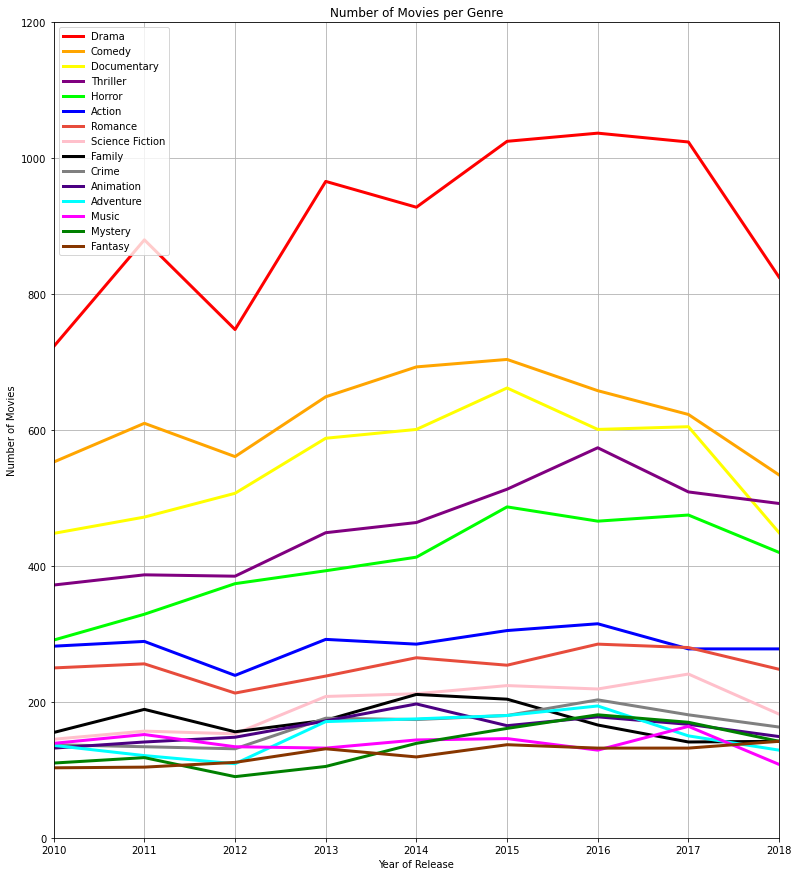

In [641]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(figsize= (13,15))

ax.set_xlim(0, 8)
ax.set_ylim(0, 1200)
ax.set_title('Number of Movies per Genre')
ax.set_xlabel('Year of Release')
ax.set_ylabel('Number of Movies')

imagebox = OffsetImage(arr_lena, zoom=0.4)

for p in range(len((genre_names_sorted))-4):
    ax.plot(x[genre_names_sorted[p]][-11:-2],label = genre_names_sorted[p],color=colors[p],linewidth=3)

plt.grid()
plt.draw()
plt.legend(loc="upper left")
plt.savefig('total_num_movies_per_genre.png',bbox_inches='tight')
plt.show()

In [642]:
genre_names = list(genre_id.values())
genre_names

['Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western']

In [643]:
x2 = x.to_frame()

In [644]:
numbers_movie_budgets = pd.read_csv('tn.movie_budgets.csv')
numbers_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [645]:
movie_roi = pd.read_csv('movie_budgets_roi.csv')

In [646]:
joined_df = pd.merge(movie_database,
                           movie_roi,
                            
                           left_on = 'original_title',
                           right_on = 'movie')

In [647]:
joined_df.groupby('release_year')

In [648]:
z = joined_df.loc[joined_df['Drama']==1]
z

,Unnamed: 0_x,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,...,release_year,Unnamed: 0_y,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,net_profit,roi
19,15,"[18, 12, 10749, 14]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,The Twilight Saga: Eclipse,6.0,4909,...,2010,752,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,300531751,706102828,638102828,938.386512
21,18,"[18, 28, 53]",2502,en,The Bourne Supremacy,18.199,2004-07-23,The Bourne Supremacy,7.3,4367,...,2004,490,91,"Jul 23, 2004",The Bourne Supremacy,85000000,176087450,311001124,226001124,265.883675
22,19,"[9648, 18, 53]",11324,en,Shutter Island,18.060,2010-02-18,Shutter Island,8.1,12625,...,2010,551,52,"Feb 19, 2010",Shutter Island,80000000,128012934,299461782,219461782,274.327227
23,20,"[9648, 18, 28, 53]",2501,en,The Bourne Identity,17.935,2002-06-14,The Bourne Identity,7.4,5406,...,2002,850,51,"Jun 14, 2002",The Bourne Identity,60000000,121468960,214357371,154357371,257.262285
26,23,"[18, 10749]",41233,en,Step Up 3D,17.174,2010-08-06,Step Up 3D,6.7,1160,...,2010,1908,9,"Aug 6, 2010",Step Up 3D,30000000,42400223,165889117,135889117,452.963723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,24638,"[10752, 18]",514407,en,Indivisible,5.599,2018-10-26,Indivisible,5.4,13,...,2018,4792,93,"Oct 26, 2018",Indivisible,2700000,3511417,3588305,888305,32.900185
2297,24691,"[80, 18, 28]",547590,en,El Chicano,5.274,2019-05-03,El Chicano,9.0,1,...,2019,3915,16,"May 3, 2019",El Chicano,8000000,700261,700261,-7299739,-91.246737
2298,24815,"[80, 18, 35, 28]",506971,ur,Teefa in Trouble,4.486,2018-07-20,Teefa in Trouble,7.6,11,...,2018,5107,8,"Jul 20, 2018",Teefa in Trouble,1500000,0,98806,-1401194,-93.412933
2299,24969,[18],510034,en,Diane,3.521,2018-04-22,Diane,7.5,4,...,2018,4797,98,"Jan 12, 1956",Diane,2660000,0,0,-2660000,-100.000000


In [689]:
avg_genre_roi = {}
for p in genre_names:
    avg_genre_roi[p] = (joined_df.loc[joined_df[p]==1].groupby(['release_year'])['roi'].mean()[-3:-1].mean())
avg_genre_roi

{'Action': 212.1694002639224,
 'Adventure': 229.63873929426154,
 'Animation': 293.7814178117473,
 'Comedy': 251.59810259754386,
 'Crime': 365.3360383881475,
 'Documentary': 91.43225380943585,
 'Drama': 299.2781770934764,
 'Family': 504.2166118161628,
 'Fantasy': 466.17920655120315,
 'History': 97.88803400369314,
 'Horror': 1012.110995462333,
 'Music': 129.99270336565655,
 'Mystery': 628.9785744929193,
 'Romance': 552.7294815569894,
 'Science Fiction': 341.8728561193808,
 'TV Movie': 32.20397098039215,
 'Thriller': 624.5060724369168,
 'War': 82.60041055789516,
 'Western': 58.16019999999999}

In [650]:
genre_names_sorted
avg_genre_roi_sorted = {}
for p in genre_names_sorted:
    avg_genre_roi_sorted[p] = avg_genre_roi[p]
avg_genre_roi_sorted

{'Drama': 299.2781770934764,
 'Comedy': 251.59810259754386,
 'Documentary': 91.43225380943585,
 'Thriller': 624.5060724369168,
 'Horror': 1012.110995462333,
 'Action': 212.1694002639224,
 'Romance': 552.7294815569894,
 'Science Fiction': 341.8728561193808,
 'Family': 504.2166118161628,
 'Crime': 365.3360383881475,
 'Animation': 293.7814178117473,
 'Adventure': 229.63873929426154,
 'Music': 129.99270336565655,
 'Mystery': 628.9785744929193,
 'Fantasy': 466.17920655120315,
 'TV Movie': 32.20397098039215,
 'History': 97.88803400369314,
 'War': 82.60041055789516,
 'Western': 58.16019999999999}

In [651]:
avg_genre_roi_sorted_names = list(avg_genre_roi_sorted.keys())
(avg_genre_roi_sorted_names)

['Drama',
 'Comedy',
 'Documentary',
 'Thriller',
 'Horror',
 'Action',
 'Romance',
 'Science Fiction',
 'Family',
 'Crime',
 'Animation',
 'Adventure',
 'Music',
 'Mystery',
 'Fantasy',
 'TV Movie',
 'History',
 'War',
 'Western']

In [680]:
avg_genre_roi_sorted_values = list(avg_genre_roi_sorted.values())
avg_genre_roi_sorted_values

[299.2781770934764,
 251.59810259754386,
 91.43225380943585,
 624.5060724369168,
 1012.110995462333,
 212.1694002639224,
 552.7294815569894,
 341.8728561193808,
 504.2166118161628,
 365.3360383881475,
 293.7814178117473,
 229.63873929426154,
 129.99270336565655,
 628.9785744929193,
 466.17920655120315,
 32.20397098039215,
 97.88803400369314,
 82.60041055789516,
 58.16019999999999]

In [653]:
colors = ['red','orange','yellow','purple','lime','blue','#E74C3C','pink','black','grey','indigo',
          'cyan','magenta','green','#873600']

In [690]:
avg_genre_roi
avg_genre_roi = dict(sorted(avg_genre_roi.items(), key=lambda item: item[1],reverse=True))

In [691]:
avg_genre_roi

{'Horror': 1012.110995462333,
 'Mystery': 628.9785744929193,
 'Thriller': 624.5060724369168,
 'Romance': 552.7294815569894,
 'Family': 504.2166118161628,
 'Fantasy': 466.17920655120315,
 'Crime': 365.3360383881475,
 'Science Fiction': 341.8728561193808,
 'Drama': 299.2781770934764,
 'Animation': 293.7814178117473,
 'Comedy': 251.59810259754386,
 'Adventure': 229.63873929426154,
 'Action': 212.1694002639224,
 'Music': 129.99270336565655,
 'History': 97.88803400369314,
 'Documentary': 91.43225380943585,
 'War': 82.60041055789516,
 'Western': 58.16019999999999,
 'TV Movie': 32.20397098039215}

In [692]:
avg_genre_roi.pop('TV Movie')
avg_genre_roi.pop('Western')
avg_genre_roi.pop('War')

82.60041055789516

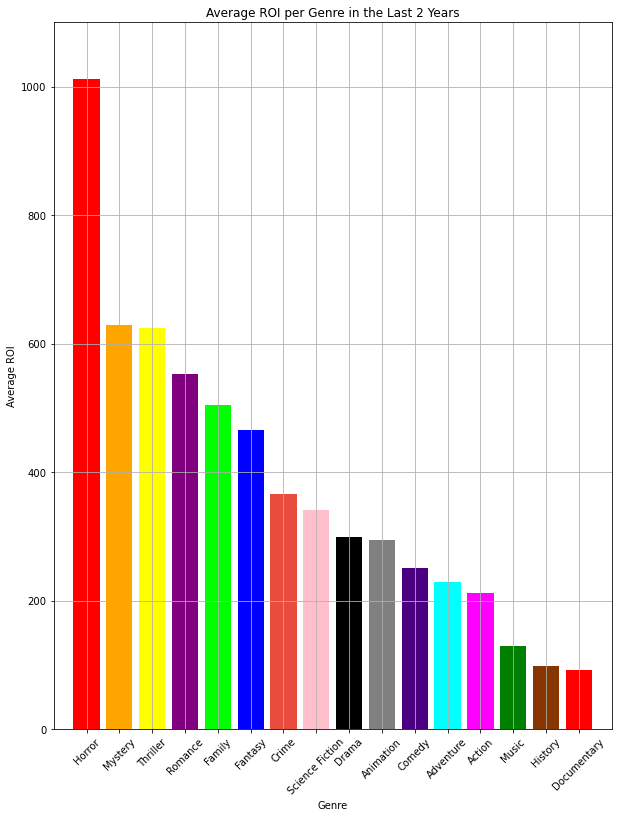

In [693]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(figsize= (10,13))

ax.set_xlim(-1, 16)
ax.set_ylim(0, 1100)
ax.set_title('Average ROI per Genre in the Last 2 Years')
ax.set_xlabel('Genre')
ax.set_ylabel('Average ROI')

imagebox = OffsetImage(arr_lena, zoom=0.4)

plt.bar(list(avg_genre_roi.keys()),list(avg_genre_roi.values()),color=colors)

plt.xticks(rotation=45)
plt.grid()
plt.draw()
plt.savefig('avg_roi_per_genre.png',bbox_inches='tight')
plt.show()

In [695]:
colors2 = ['red','orange','yellow','purple','lime','grey','grey','grey','grey','grey','grey',
          'grey','grey','grey','grey']

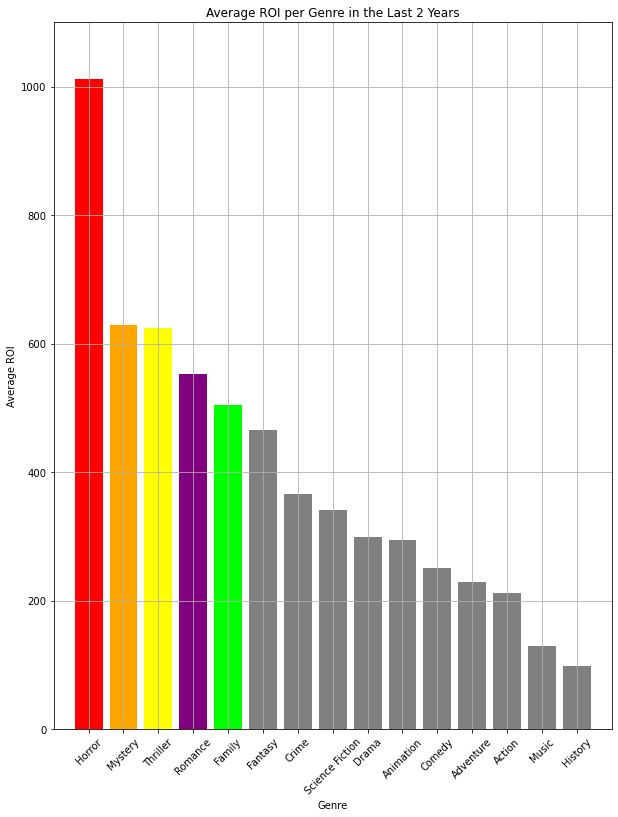

In [701]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(figsize= (10,13))

ax.set_xlim(-1, 15)
ax.set_ylim(0, 1100)
ax.set_title('Average ROI per Genre in the Last 2 Years')
ax.set_xlabel('Genre')
ax.set_ylabel('Average ROI')

imagebox = OffsetImage(arr_lena, zoom=0.4)

plt.bar(list(avg_genre_roi.keys())[:-1],list(avg_genre_roi.values())[:-1],color=colors2)

plt.xticks(rotation=45)
plt.grid()
plt.draw()
plt.savefig('avg_roi_per_genre_greyed_out.png',bbox_inches='tight')
plt.show()

In [656]:
joined_df.loc[joined_df['Action']==1].groupby(['release_year'])['roi'].mean()[-3:-1].mean()

212.1694002639224

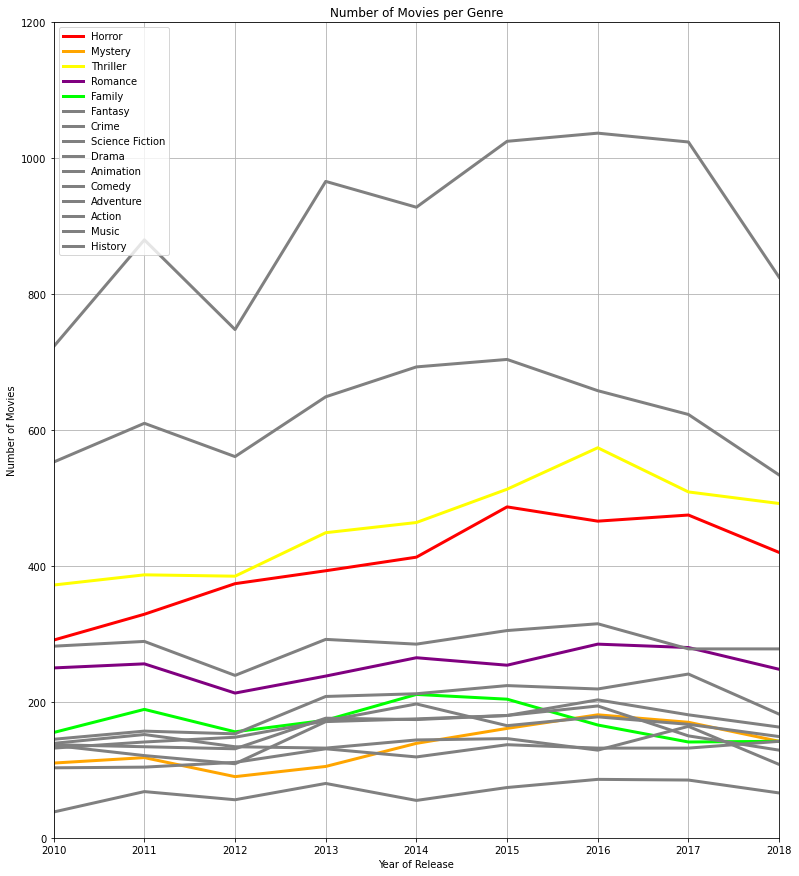

In [705]:
x = movie_database.groupby(['release_year'])[valueList].sum().unstack()
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, ax = plt.subplots(figsize= (13,15))

ax.set_xlim(0, 8)
ax.set_ylim(0, 1200)
ax.set_title('Number of Movies per Genre')
ax.set_xlabel('Year of Release')
ax.set_ylabel('Number of Movies')

imagebox = OffsetImage(arr_lena, zoom=0.4)

for p in range(len((genre_names_sorted))-4):
    ax.plot(x[list(avg_genre_roi.keys())[p]][-11:-2],label = list(avg_genre_roi.keys())[p],color=colors2[p],linewidth=3)

plt.grid()
plt.draw()
plt.legend(loc="upper left")
plt.savefig('total_num_movies_per_genre2.png',bbox_inches='tight')
plt.show()

In [657]:
x = joined_df.groupby(['release_year'])[valueList].sum().unstack().to_frame()
x


0
        release_year   
Action  1946          0
        1968          0
        1972          0
        1976          0
        1977          0
...                  ..
Western 2015          6
        2016          4
        2017          1
        2018          2
        2019          0

[741 rows x 1 columns]

In [735]:
genre_roi = {}
for p in genre_names:
    genre_roi[p] = (joined_df.loc[joined_df[p]==1].groupby(['roi']))
genre_roi
joined_df.loc[joined_df['Action']==1].groupby(['release_year']).count()

,Unnamed: 0_x,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,...,Western,Unnamed: 0_y,id_y,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,net_profit,roi
release_year,,,,,,,,,,,,,,,,,,,,,
1980,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1982,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1984,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1988,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1991,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1995,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1996,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1997,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1998,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


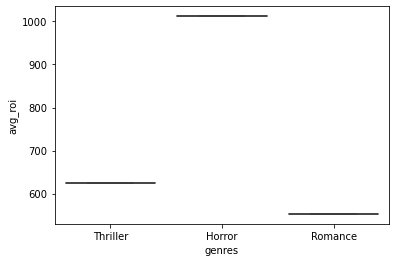

In [717]:
import seaborn as sns
import matplotlib.pyplot as plt


avg_genre_roi
sns.boxplot( x=df['genres'], y=df["avg_roi"] );
plt.show()

In [712]:
pd.(avg_genre_roi)

AttributeError: module 'pandas' has no attribute 'to_frame'

In [715]:
data = {
  "genres": ['Thriller','Horror','Romance'],
  "avg_roi": [avg_genre_roi['Thriller'],avg_genre_roi['Horror'],avg_genre_roi['Romance']]
}
df = pd.DataFrame(data)
df

,genres,avg_roi
0,Thriller,624.506072
1,Horror,1012.110995
2,Romance,552.729482
